In [14]:
from fastai.tabular import * 
import pandas as pd
import sklearn
from matplotlib import pyplot as plt


In [15]:
crime_property_light_population = pd.read_csv("balanced_data.csv").iloc[:,1:]
crime_property_light_population.head()

,OFFENSE_CODE_GROUP,SHOOTING,MONTH,DAY_OF_WEEK,HOUR,Population density (per square mile of land area),BLDG_VAL,LAND_VAL,light_density,Lat,Long,latbin,longbin,light_count,graffiti_count
0,2,0,7,0,23,19926.9,560.432683,189.333050,1.000000,42.343765,-71.088669,32.0,27.0,165.0,45.0
1,2,0,8,5,12,15871.3,4156.595899,36.813618,0.684760,42.320755,-71.090354,26.0,26.0,103.0,40.0
2,2,0,7,3,5,24456.0,3738.859654,105.378164,0.783085,42.324012,-71.108921,27.0,21.0,146.0,44.0
3,2,0,8,1,16,11553.7,121.169778,34.318379,0.548610,42.290953,-71.046736,17.0,39.0,0.0,3.0
4,2,0,8,0,18,19926.9,560.432683,189.333050,1.000000,42.338655,-71.081457,31.0,29.0,151.0,84.0


In [16]:
crime_property_light_population.OFFENSE_CODE_GROUP.unique()


array([2, 1, 0, 3, 4])

In [17]:
predictors = ['OFFENSE_CODE_GROUP','SHOOTING', 'MONTH','HOUR', 'DAY_OF_WEEK', \
              'Population density (per square mile of land area)', \
              'BLDG_VAL', 'LAND_VAL',\
              'light_density']
df = crime_property_light_population[predictors]
df = df.dropna()
df.head()

,OFFENSE_CODE_GROUP,SHOOTING,MONTH,HOUR,DAY_OF_WEEK,Population density (per square mile of land area),BLDG_VAL,LAND_VAL,light_density
0,2,0,7,23,0,19926.9,560.432683,189.333050,1.000000
1,2,0,8,12,5,15871.3,4156.595899,36.813618,0.684760
2,2,0,7,5,3,24456.0,3738.859654,105.378164,0.783085
3,2,0,8,16,1,11553.7,121.169778,34.318379,0.548610
4,2,0,8,18,0,19926.9,560.432683,189.333050,1.000000


In [18]:
#top5 = df['OFFENSE_CODE_GROUP'].value_counts().index[:5]
# top5= ['Auto Theft','Motor Vehicle Accident Response', 'Larceny','Robbery','Residential Burglary']
# #cut the df
# df = df[df['OFFENSE_CODE_GROUP'].isin(top5)]
#enc = OneHotEncoder(handle_unknown='ignore')

In [19]:
#df_cat = enc.fit_transform(df[["MONTH","SHOOTING","DAY_OF_WEEK"]]).toarray()

#df_cat = pd.DataFrame(df_cat, columns=enc.get_feature_names(['MONTH','SHOOTING', 'DAY_OF_WEEK']))
#df = pd.concat([df, df_cat], axis=1)
#df = df.dropna()


df.head()

,OFFENSE_CODE_GROUP,SHOOTING,MONTH,HOUR,DAY_OF_WEEK,Population density (per square mile of land area),BLDG_VAL,LAND_VAL,light_density
0,2,0,7,23,0,19926.9,560.432683,189.333050,1.000000
1,2,0,8,12,5,15871.3,4156.595899,36.813618,0.684760
2,2,0,7,5,3,24456.0,3738.859654,105.378164,0.783085
3,2,0,8,16,1,11553.7,121.169778,34.318379,0.548610
4,2,0,8,18,0,19926.9,560.432683,189.333050,1.000000


In [20]:
len(df)

29887

In [21]:
procs = [FillMissing, Categorify, Normalize]

In [22]:
valid_idx = range(len(df)-5000, len(df))

In [23]:
dep_var = 'OFFENSE_CODE_GROUP'
cat_names = ["MONTH","SHOOTING","DAY_OF_WEEK","HOUR"]

data = TabularDataBunch.from_df('./model_data', df, dep_var, \
                                valid_idx=valid_idx, procs=procs, \
                                cat_names=cat_names)

In [24]:
print(data.train_ds.cont_names) 

['BLDG_VAL', 'Population density (per square mile of land area)', 'light_density', 'LAND_VAL']


In [25]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy,fbeta])
learn.lr_find(stop_div=False, num_it=50)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


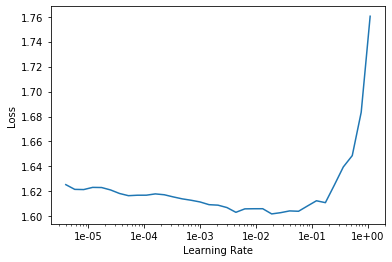

In [26]:
learn.recorder.plot()

In [35]:
learn = tabular_learner(data, layers=[200,100], metrics=top_k_accuracy(targs = \
                                    [0,1,2,3,4], k = 5)
                       )
learn.fit_one_cycle(50, 1e-3)

TypeError: top_k_accuracy() missing 1 required positional argument: 'input'